In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

Saving Picture1.jpg to Picture1 (4).jpg


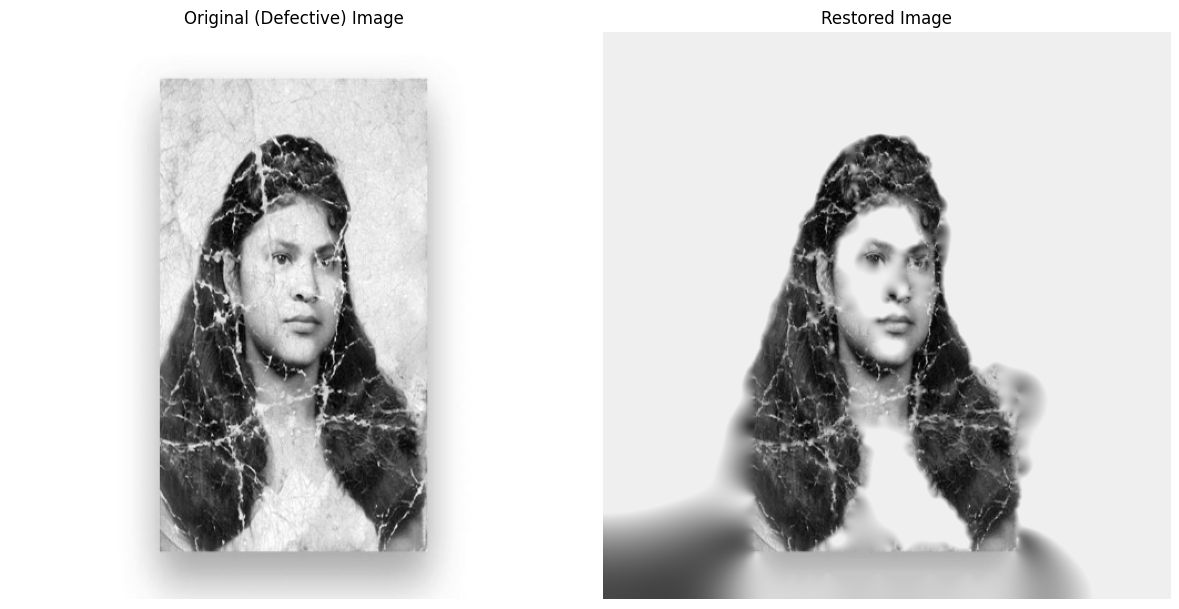

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
from skimage.io import imread

# Upload image and mask
uploaded = files.upload()  # Upload one image and one mask CSV file

# Load image and mask
for filename in uploaded:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        defect_image = imread(filename)
    elif filename.lower().endswith('.csv'):
        mask = pd.read_csv(filename, header=None).to_numpy()

# Resize image
defect_image = resize(defect_image, (512, 512), anti_aliasing=True)

# Convert grayscale to RGB if needed
if defect_image.ndim == 2:  # grayscale image
    defect_image = np.stack([defect_image] * 3, axis=-1)

# Resize the mask to match the height and width
mask = resize(mask, (defect_image.shape[0], defect_image.shape[1]), preserve_range=True).astype(bool)

# Apply inpainting
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, channel_axis=-1)

# Plot comparison
def plot_comparison(original, restored, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title('Original (Defective) Image')
    ax[0].axis('off')

    ax[1].imshow(restored)
    ax[1].set_title(title)
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

plot_comparison(defect_image, restored_image, 'Restored Image')